In [2]:
# Imports
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import OneHotEncoder

In [3]:
conn = sqlite3.connect('../data/im.db')

The capstone repo recommends that focus should be placed on the movie_basics and movie_ratings, especially if on a time crunch... so I will be checking out those files.

In [4]:
# Load the list of tables in the DB
tables = pd.read_sql("""SELECT name FROM sqlite_master WHERE type = 'table';""", conn)
tables

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [5]:
# Look into movie ratings
movie_ratings = pd.read_sql("""
    SELECT *
    FROM movie_ratings""", conn)
movie_ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [6]:
# Look into movie basics
movie_basics = pd.read_sql("""
    SELECT *
    FROM movie_basics""", conn)
movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [7]:
# Checking to see if any movie id appears more than once
pd.read_sql("""
    SELECT *
    FROM movie_basics
    GROUP BY movie_id
    HAVING COUNT(movie_id) > 1;
""", conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres


In [8]:
# Connect the two tables
mb_mr = pd.read_sql("""
    SELECT *
    FROM movie_basics as b
    INNER JOIN movie_ratings as r
        ON b.movie_id = r.movie_id;
""", conn)
mb_mr 

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt0066787,7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,tt0069049,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",tt0069204,6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",tt0100275,6.5,119
...,...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,tt9913084,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",tt9914286,8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,tt9914642,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,tt9914942,6.6,5


In [10]:
# Will remove duplicate column without damaging indeces
mb_mr = mb_mr.loc[:, ~mb_mr.columns.duplicated()].copy()
mb_mr

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5


In [11]:
# comparing table lengths
print(f'length of movie_basics table: {len(movie_basics)}')
print(f'length of movie_ratings table: {len(movie_ratings)}')
print(f'length of joined table: {len(mb_mr)}')

length of movie_basics table: 146144
length of movie_ratings table: 73856
length of joined table: 73856


In [12]:
# split genres on commas
genre_split = mb_mr['genres'].str.split(',')
genre_split

0          [Action, Crime, Drama]
1              [Biography, Drama]
2                         [Drama]
3                 [Comedy, Drama]
4        [Comedy, Drama, Fantasy]
                   ...           
73851               [Documentary]
73852             [Drama, Family]
73853               [Documentary]
73854                        None
73855               [Documentary]
Name: genres, Length: 73856, dtype: object

In [13]:
# apply code from https://stackoverflow.com/questions/29034928/pandas-convert-a-column-of-list-to-dummies
# This creates dummy columns for all of the split genre data
genre_dummies = pd.get_dummies(genre_split.apply(pd.Series).stack()).sum(level=0)
genre_dummies

,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,1,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73850,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
73851,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
73852,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
73853,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# merge the genres df with movie_basic/movie_ratings table, and drop original genre column
mb_mr_enc = mb_mr.join(genre_dummies, how="inner")
mb_mr_enc = mb_mr_enc.drop(columns="genres")
mb_mr_enc

,movie_id,primary_title,original_title,start_year,runtime_minutes,averagerating,numvotes,Action,Adult,Adventure,...,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,7.0,77,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,7.2,43,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,6.9,4517,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,6.1,13,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,6.5,119,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73850,tt9913056,Swarm Season,Swarm Season,2019,86.0,6.2,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,6.2,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,8.7,136,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73853,tt9914642,Albatross,Albatross,2017,NaN,8.5,8,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# checking null value distribution
mb_mr_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73052 entries, 0 to 73855
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73052 non-null  object 
 1   primary_title    73052 non-null  object 
 2   original_title   73052 non-null  object 
 3   start_year       73052 non-null  int64  
 4   runtime_minutes  65720 non-null  float64
 5   averagerating    73052 non-null  float64
 6   numvotes         73052 non-null  int64  
 7   Action           73052 non-null  uint8  
 8   Adult            73052 non-null  uint8  
 9   Adventure        73052 non-null  uint8  
 10  Animation        73052 non-null  uint8  
 11  Biography        73052 non-null  uint8  
 12  Comedy           73052 non-null  uint8  
 13  Crime            73052 non-null  uint8  
 14  Documentary      73052 non-null  uint8  
 15  Drama            73052 non-null  uint8  
 16  Family           73052 non-null  uint8  
 17  Fantasy     

In [20]:
# checking out many films are shorter than 1 hour
mb_mr_enc[mb_mr_enc['runtime_minutes'] < 60].sort_values(by='runtime_minutes')

,movie_id,primary_title,original_title,start_year,runtime_minutes,averagerating,numvotes,Action,Adult,Adventure,...,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
66527,tt7379378,I Heart NY,I Heart NY,2017,3.0,7.8,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47173,tt4597838,Limitless,Limitless,2015,3.0,6.7,10,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20749,tt2258391,Hermeneutics,Hermeneutics,2012,3.0,6.2,8,0,0,0,...,0,0,0,0,0,0,0,0,1,0
66397,tt7349926,The Coffin Club,The Coffin Club,2017,4.0,9.4,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
57389,tt5884852,Donald Trump courageously stands up to Bill Cl...,Donald Trump courageously stands up to Bill Cl...,2016,4.0,4.3,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68359,tt7755520,Obscuro Barroco,Obscuro Barroco,2018,59.0,7.3,166,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25791,tt2507468,Welcome to the World,Welcome to the World,2012,59.0,7.3,11,0,0,0,...,0,0,0,0,0,0,0,0,0,0
70919,tt8485446,Open Close Movie,Open Close Movie,2018,59.0,9.0,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10933,tt1815689,Els monstres de ca meva (Los monstruos de mi c...,Els monstres de ca meva (Los monstruos de mi c...,2010,59.0,8.2,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
# Checking runtime minutes information...
# max=51420...
mb_mr_enc['runtime_minutes'].describe()

count    65720.000000
mean        94.732273
std        209.377017
min          3.000000
25%         81.000000
50%         91.000000
75%        104.000000
max      51420.000000
Name: runtime_minutes, dtype: float64

In [24]:
# sort movies by longest in duration
mb_mr_enc.sort_values(by="runtime_minutes", ascending=False)

,movie_id,primary_title,original_title,start_year,runtime_minutes,averagerating,numvotes,Action,Adult,Adventure,...,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
70280,tt8273150,Logistics,Logistics,2012,51420.0,5.0,17,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27683,tt2659636,Modern Times Forever,Modern Times Forever,2011,14400.0,6.2,69,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15171,tt2008009,The Clock,The Clock,2010,1440.0,8.9,219,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71441,tt8677246,Bullfighting Memories,Bullfighting Memories,2017,1100.0,8.6,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
72424,tt9047474,La flor,La flor,2018,808.0,8.5,100,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73816,tt9887130,The Human Comedy,The Human Comedy,2019,NaN,3.2,17,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73828,tt9899290,Band Together with Logic,Band Together with Logic,2019,NaN,8.7,10,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73830,tt9899850,The Agitation,Ashoftegi,2019,NaN,4.9,14,0,0,0,...,0,0,0,0,0,0,0,1,0,0
73844,tt9905796,July Kaatril,July Kaatril,2019,NaN,9.0,5,0,0,0,...,0,0,0,1,0,0,0,0,0,0


### Important note about the longest films
I assumed the runtime minutes was an input error for the film *Logistics*, but after further research, the movie is, in fact, the longest film ever made at 51,420 minutes (or 5 weeks and 17 hours!). Additionally, the film *Modern Times Forever* is legitimately 10 days long.

In [22]:
# Checking average rating to see if rating is standardized out of 10
mb_mr_enc['averagerating'].describe()

count    73052.000000
mean         6.330930
std          1.474699
min          1.000000
25%          5.500000
50%          6.500000
75%          7.400000
max         10.000000
Name: averagerating, dtype: float64

### Begin Groupby

In [25]:
mb_mr_enc.groupby("start_year").agg({"averagerating": ["mean", "median"]})

averagerating       
                    mean median
start_year                     
2010            6.256245    6.4
2011            6.287352    6.5
2012            6.296212    6.4
2013            6.285693    6.4
2014            6.319761    6.5
2015            6.265854    6.4
2016            6.344421    6.5
2017            6.392359    6.5
2018            6.414393    6.6
2019            6.703227    6.9

In [37]:
# Create list of genre columns to analyze ---- did not work, would just create massive multiindex structure
cols = mb_mr_enc.columns[7:]
mb_mr_enc.groupby(["Action", "start_year"]).agg({"averagerating": ["mean", "median"]})

averagerating       
                           mean median
Action start_year                     
0      2010            6.321082   6.50
       2011            6.345792   6.50
       2012            6.337737   6.50
       2013            6.343392   6.50
       2014            6.366302   6.50
       2015            6.322940   6.50
       2016            6.402837   6.50
       2017            6.447932   6.60
       2018            6.472443   6.60
       2019            6.753791   6.90
1      2010            5.692330   5.90
       2011            5.731503   5.90
       2012            5.880897   6.10
       2013            5.707252   5.80
       2014            5.868435   6.00
       2015            5.728377   5.80
       2016            5.816434   5.90
       2017            5.885831   6.00
       2018            5.853352   6.00
       2019            6.216176   6.45

In [39]:
cols

26

In [51]:
mb_mr_enc[:7]

,movie_id,primary_title,original_title,start_year,runtime_minutes,averagerating,numvotes,Action,Adult,Adventure,...,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,7.0,77,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,7.2,43,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,6.9,4517,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,6.1,13,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,6.5,119,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,tt0112502,Bigfoot,Bigfoot,2017,NaN,4.1,32,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,8.1,263,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [54]:
mb_mr_enc["averagerating"].loc[mb_mr_enc["Action"] == 1].mean()

5.810360618202632

In [152]:
mb_mr_enc["Action"].loc[mb_mr_enc["Action"] == 1].sum()

6988

In [60]:
mb_mr_enc

,movie_id,primary_title,original_title,start_year,runtime_minutes,averagerating,numvotes,Action,Adult,Adventure,...,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,7.0,77,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,7.2,43,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,6.9,4517,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,6.1,13,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,6.5,119,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73850,tt9913056,Swarm Season,Swarm Season,2019,86.0,6.2,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,6.2,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,8.7,136,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73853,tt9914642,Albatross,Albatross,2017,NaN,8.5,8,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [101]:
#check genre columns 
cols

Index(['Action', 'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Game-Show',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News',
       'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War',
       'Western'],
      dtype='object')

In [158]:
genre_dict = {}

# for each column in list of genre columns, append avg rating 
for col in cols:
    # if there are more than 100 records of film genre
    if mb_mr_enc[col].loc[mb_mr_enc[col] == 1].sum() > 100:
        genre_dict[col] = mb_mr_enc["averagerating"].loc[mb_mr_enc[col] == 1].mean()

genre_dict

{'Action': 5.810360618202632,
 'Adventure': 6.196201205134923,
 'Animation': 6.2483075157773955,
 'Biography': 7.1622735626148595,
 'Comedy': 6.0026894158473105,
 'Crime': 6.115441335935806,
 'Documentary': 7.332090350926604,
 'Drama': 6.401559048980123,
 'Family': 6.394724501758499,
 'Fantasy': 5.919473189087488,
 'History': 7.04095575221239,
 'Horror': 5.003440187646598,
 'Music': 7.091971544715447,
 'Musical': 6.498335644937587,
 'Mystery': 5.920401447844685,
 'News': 7.2713298791019,
 'Romance': 6.146607983001973,
 'Sci-Fi': 5.489755213055305,
 'Sport': 6.961492790500424,
 'Thriller': 5.639114031885116,
 'War': 6.584290738569753,
 'Western': 5.868214285714285}

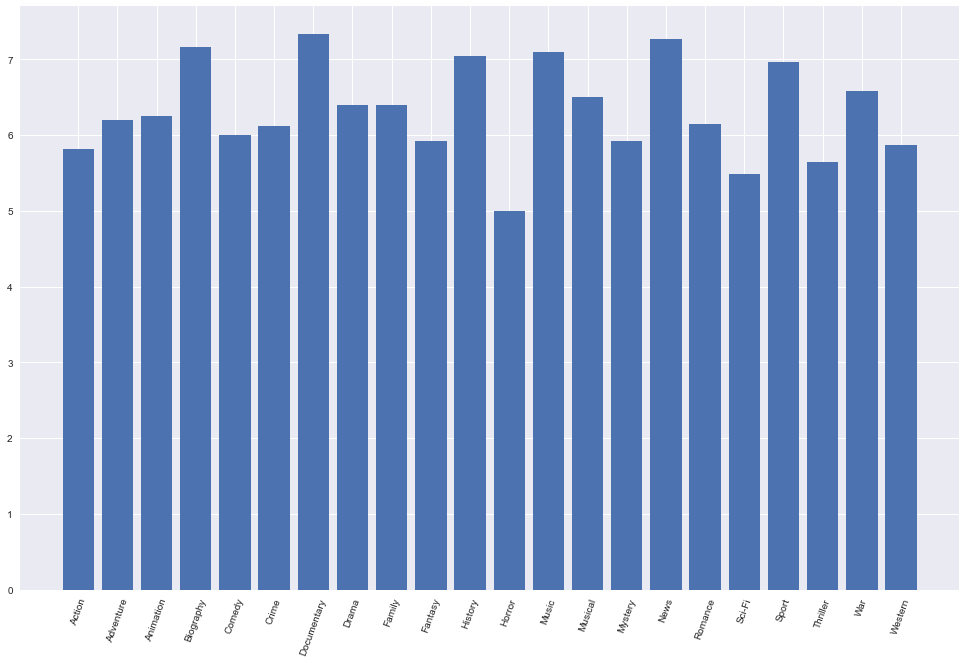

In [159]:
# create bar chart to show total distribution of avg ratings
x = genre_dict.keys()
y = genre_dict.values()

fig, ax = plt.subplots(figsize=(15, 10))
plt.style.use('seaborn')

plt.xticks(rotation = 70)
plt.bar(x, y);

In [160]:
genre = pd.DataFrame.from_dict(genre_dict, orient='index', columns=["avg_rating"])
genre

,avg_rating
Action,5.810361
Adventure,6.196201
Animation,6.248308
Biography,7.162274
Comedy,6.002689
Crime,6.115441
Documentary,7.332090
Drama,6.401559
Family,6.394725
Fantasy,5.919473


In [161]:
# Look at percentiles of the genre ratings
genre.describe()

,avg_rating
count,22.000000
mean,6.322683
std,0.622705
min,5.003440
25%,5.919705
50%,6.222254
75%,6.867192
max,7.332090


In [164]:
# Look at movie genres above mean
genre_above_avg = genre[genre["avg_rating"] > 6.32].sort_values(by="avg_rating", ascending=False)
genre_above_avg

,avg_rating
Documentary,7.332090
News,7.271330
Biography,7.162274
Music,7.091972
History,7.040956
Sport,6.961493
War,6.584291
Musical,6.498336
Drama,6.401559
Family,6.394725


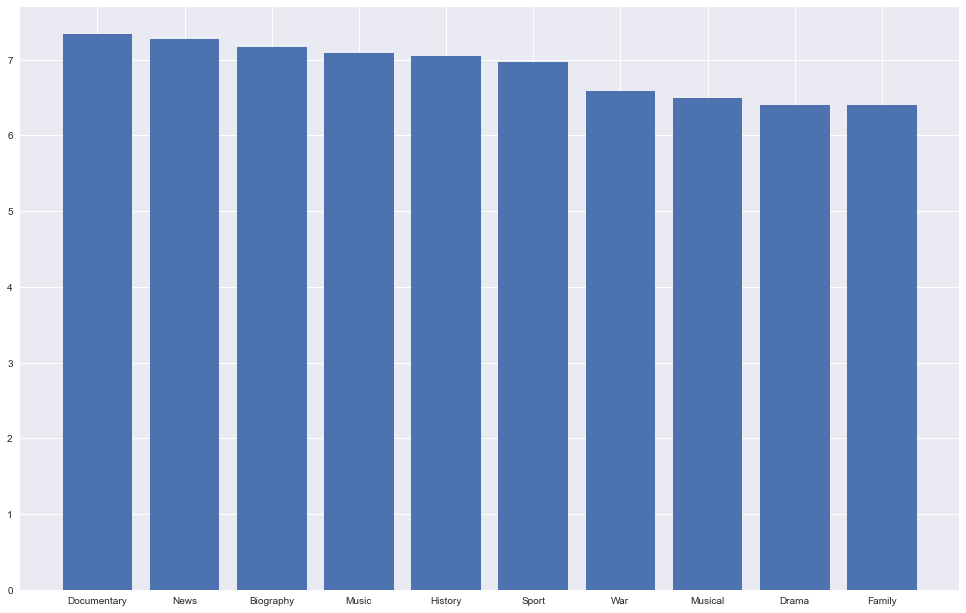

In [192]:
# create bar chart to show total distribution of avg ratings of ABOVE AVG MOVIES
x = genre_above_avg.index
y = genre_above_avg['avg_rating']

fig, ax = plt.subplots(figsize=(15, 10))
plt.style.use('seaborn')

plt.xticks(rotation = 0)
plt.bar(x, y);

In [162]:
# look at movie genres above 75th percentile
genre_best = genre[genre["avg_rating"] > 6.86].sort_values(by="avg_rating", ascending=False)
genre_best

,avg_rating
Documentary,7.332090
News,7.271330
Biography,7.162274
Music,7.091972
History,7.040956
Sport,6.961493


TypeError: 'int' object is not callable

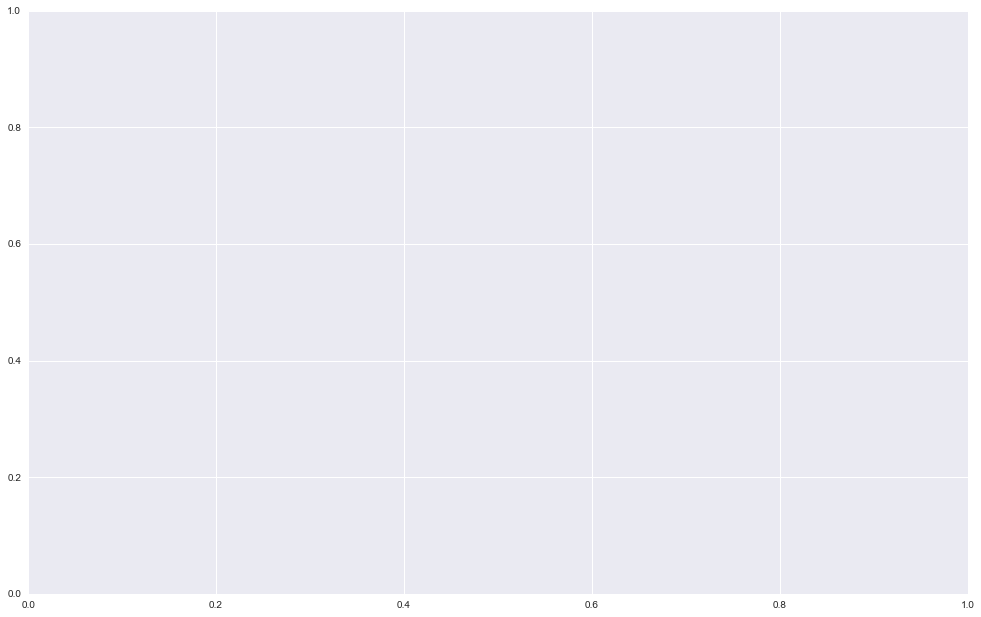

In [193]:
# create bar chart to show total distribution of avg ratings of 75th PERCENTILE RATED MOVIES
x = genre_best.index
y = genre_best['avg_rating']

fig, ax = plt.subplots(figsize=(15, 10))
plt.style.use('seaborn')

plt.ylim((0, 10))
plt.xticks(rotation = 0)
plt.bar(x, y);